In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [ ]:
path = '/content/drive/MyDrive/irs_project'

In [ ]:
import os
df = pd.read_csv(os.path.join(path, 'Training_Points_2000.csv'))
df.head()


,OBJECTID_1,Class,MNDWI,NDBI,NDVI,B1,B2,B3,B4,B5
0,1,4,-0.367266,-0.308519,0.701371,0.044255,0.076870,0.055172,0.314333,0.166107
1,2,4,-0.389354,-0.297294,0.706183,0.047225,0.081407,0.058885,0.341942,0.185220
2,3,4,-0.359884,-0.313363,0.711557,0.045437,0.081490,0.055805,0.331135,0.173120
3,4,4,-0.400781,-0.278720,0.701692,0.042798,0.082150,0.059682,0.340457,0.192040
4,5,4,-0.369968,-0.326580,0.724985,0.044117,0.080830,0.055200,0.346233,0.175760


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class','OBJECTID_1'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9a7b71beb0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9a7b719720>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 95}


In [ ]:
from sklearn.metrics import r2_score, precision_score, recall_score, f1_score, accuracy_score

# Predict the labels of the test set
y_pred = best_rf.predict(X_test)

# Calculate and print the r2_score, precision, recall, and f1 score
print('r2_score:', r2_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred, average='weighted'))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1 score:', f1_score(y_test, y_pred, average='weighted'))
print('accuracy:',accuracy_score(y_test, y_pred))

r2_score: 0.8765060240963856
precision: 0.885085045742522
recall: 0.8780487804878049
f1 score: 0.8776735459662289
accuracy: 0.8780487804878049


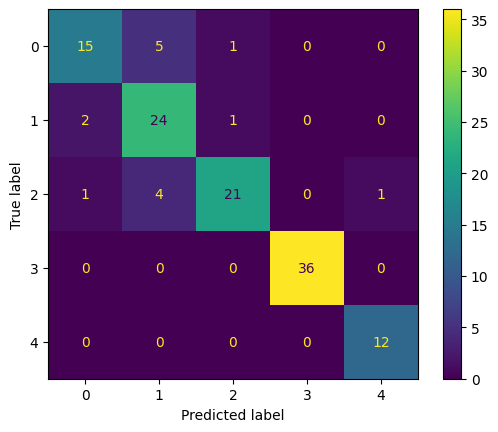

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

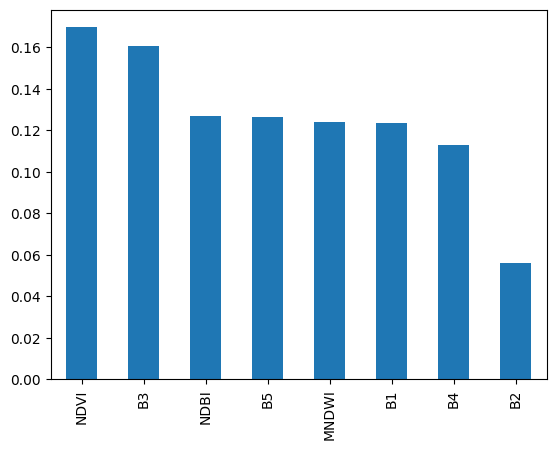

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

<ipython-input-11-a957fa468392>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


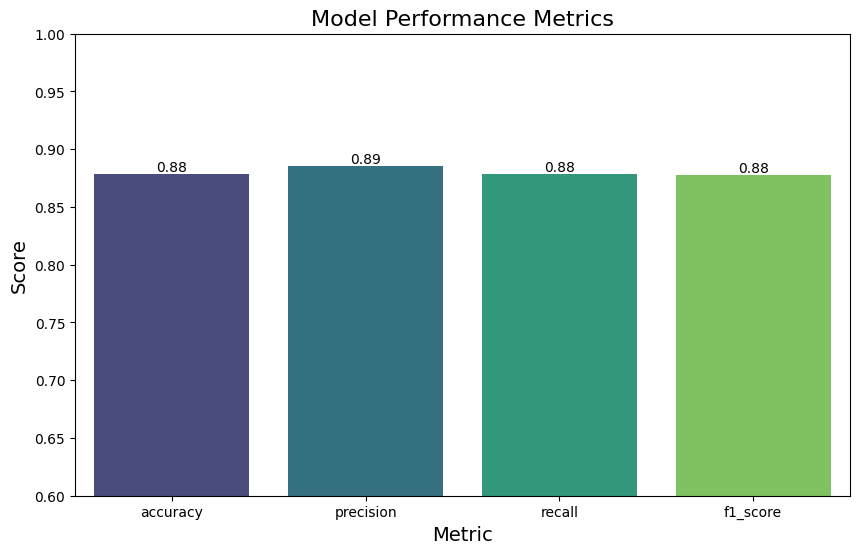

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

# Create a list of values for each metric
values = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]

# Create a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')

# Add the values to each column
for i, value in enumerate(values):
  plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the y-axis limits
plt.ylim(0.6, 1.0)

# Add a title and labels
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Show the plot
plt.show()


In [ ]:
!pip install rioxarray
!pip install rasterio
import rasterio as rio
import tifffile as tiff
import matplotlib.pyplot as plt
import rioxarray
from tifffile import imsave

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 55.5 MB/s eta 0:00:00


In [ ]:
import os
from glob import iglob

img_dir = '/content/drive/MyDrive/irs_project/Image_2000'
save_dir = '/content/drive/MyDrive/irs_project/Image_2000/Landsat_full.csv'

band_files = sorted(list(iglob(os.path.join(img_dir, '*.TIF'), recursive=True)))
print(band_files)

['/content/drive/MyDrive/irs_project/Image_2000/LT05_20000507_MNDWI.TIF', '/content/drive/MyDrive/irs_project/Image_2000/LT05_20000507_NDBI.TIF', '/content/drive/MyDrive/irs_project/Image_2000/LT05_20000507_NDVI.TIF', '/content/drive/MyDrive/irs_project/Image_2000/LT05_L2SP_116034_20000507_20200907_02_T1_SR_B1.TIF.TIF', '/content/drive/MyDrive/irs_project/Image_2000/LT05_L2SP_116034_20000507_20200907_02_T1_SR_B2.TIF.TIF', '/content/drive/MyDrive/irs_project/Image_2000/LT05_L2SP_116034_20000507_20200907_02_T1_SR_B3.TIF.TIF', '/content/drive/MyDrive/irs_project/Image_2000/LT05_L2SP_116034_20000507_20200907_02_T1_SR_B4.TIF.TIF', '/content/drive/MyDrive/irs_project/Image_2000/LT05_L2SP_116034_20000507_20200907_02_T1_SR_B5.TIF.TIF']


In [ ]:
import rasterio
import numpy as np
import pandas as pd

# Initialize an empty list to store the flattened image data
flattened_images = []

# Loop through each TIFF file
for file in band_files:
  # Open the TIFF image
  with rasterio.open(file) as dataset:
    # Read the image data
    image_data = dataset.read()
    print(image_data.shape)
    min = np.min(image_data)
    print(min)
    image_data[image_data == min] = 0
    print(image_data)
    # Flatten the image data
    flattened_image = image_data.flatten()
    print(flattened_image.shape)
    # Append the flattened image data to the list
    flattened_images.append(flattened_image)

In [ ]:
flatten = np.array(flattened_images)
print(flatten.shape)

(8, 2781971)


In [ ]:
import pandas as pd

band_names = []
for file in band_files:
  band_name = file.split('/')[-1].split('_')[-1].split('.')[0]
  band_names.append(band_name)
print(band_names)


# Create a DataFrame
df = pd.DataFrame(flatten)

# Transpose the DataFrame
df = df.T

# Set the column names of the DataFrame to the band names
df.columns = band_names

# Save the DataFrame to a CSV file
df.to_csv(save_dir, index=False)

['MNDWI', 'NDBI', 'NDVI', 'B1', 'B2', 'B3', 'B4', 'B5']


In [ ]:
df = pd.read_csv(save_dir)
print(df.head())

   MNDWI  NDBI  NDVI   B1   B2   B3   B4   B5
0    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
1    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
2    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
3    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
4    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0


In [ ]:
import rasterio as rio
import os
import pandas as pd
fullset = pd.read_csv(os.path.join('/content/drive/MyDrive/irs_project/Image_2000/Landsat_full.csv'))
### This code is for LULC mapping

LULC_map = best_rf.predict(fullset)

In [ ]:
print(LULC_map.shape)

(2781971,)


In [ ]:
LULC_map_df = pd.DataFrame(LULC_map)
LULC_map_df.to_csv(os.path.join(img_dir, 'LULC_map_2000.csv'), index=False)

In [ ]:
tiff_file_path = '/content/drive/MyDrive/irs_project/Image_2000/LT05_L2SP_116034_20000507_20200907_02_T1_SR_B1.TIF.TIF'
with rasterio.open(tiff_file_path) as src:
    meta = src.meta

original_shape = image_data.shape
LULC_map_image = LULC_map.reshape(original_shape)

In [ ]:
# Save the predicted data as a new .TIF file
output_file = "/content/drive/MyDrive/irs_project/Image_2000/predicted_output.tif"

# Update the metadata to reflect the number of layers and data type of the predictions
meta.update(dtype=rasterio.uint8, count=1)  # Assuming predictions are in the range 1-5 and can be stored as uint8

# Write the predicted labels to the new .TIF file
with rasterio.open(output_file, 'w', **meta) as dst:
    dst.write(LULC_map_image.astype(rasterio.uint8))

print(f"Predicted data has been saved to {output_file}")

Predicted data has been saved to /content/drive/MyDrive/irs_project/Image_2000/predicted_output.tif
